# Regularization for Machine Learning
---
## Getting Started _ Tutorial Demo
This notebook will walk you through all the functions in RegML library
#### Requirments 
#### Following libraries are required to use all the functions in RegML library

* Python(>=2.7)-------------------(Of course) If you are able to open this notebook, you already have python
* Numpy(>=1.10.4)---------------For all matrix operations  [Numpy](https://pypi.python.org/pypi/numpy) *tested on 1.10.4*
* Matplotlib(>=0.98)--------------For visualization  [Matplotlib](https://github.com/matplotlib/matplotlib) *tested on 1.15.1*
* Scipy(>=0.12)-------------------Optional -(If you need to import .mat data files)  [Scipy](https://www.scipy.org/install.html) *tested on 0.17.0*

## Contents:
1. Create and Import Dataset
2. Compute Kernel
3. Apply Filter
4. Learn
5. K-Fold Cross Validation
---
## Let's start

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import RegML as rg

## 1. Create and Import Datasets
Unlike MATLAB, array in python start with index 0,
np.where is same as find function in MATLAB

### Spiral

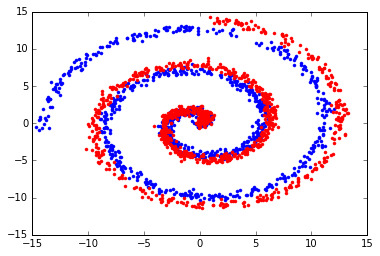

In [3]:
# X,Y,s,w,m = rg.spiral(N=[1000,1000], s = 0.5, wrappings = 'random', m = 'random')

X,Y,_,_,_ = rg.spiral(N=[1000,1000], s = 0.3)

plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')
plt.show()

### Sinusoidal

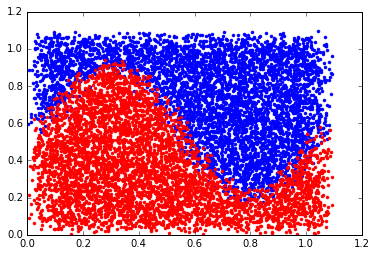

In [4]:
X,Y,s = rg.sinusoidal(N=[5000,5000], s = 0.1)

plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')
plt.show()

### Moons

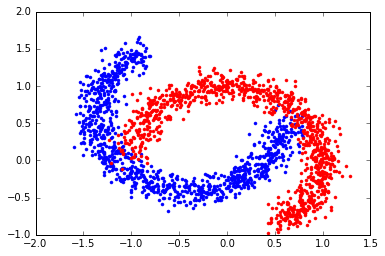

In [5]:
X,Y,s,d,a = rg.moons(N =[1000,1000], s =0.1, d='random', angle = 'random')

plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')

plt.show()

### Gaussian

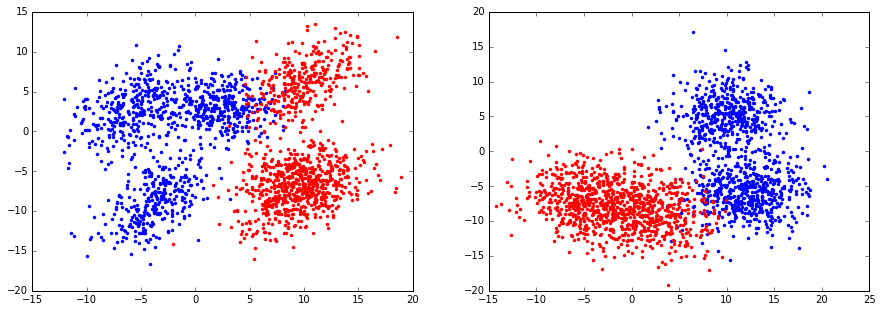

In [12]:
X,Y,nd,m,s = rg.gaussian(N=[1000,1000], ndist = 3, means ='random', sigmas='random')
plt.figure(figsize =(15,5))
plt.subplot(121)
plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')


# --------With specifications---------------------------

means1 = np.array([[-5, -7],[2, -9],[10, 5],[12,-6]])
sigma1 = np.tile(np.eye(2)* 3, (4, 1))
            
X, Y, ndist, means, sigmas = rg.gaussian(N=[1000,1000], ndist =2, means = means1, sigmas = sigma1)

plt.subplot(122)
plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')
plt.show()

### Linear

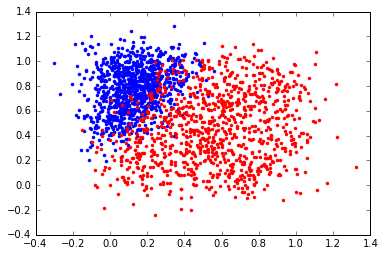

In [7]:
X,Y,m,b,s = rg.linear_data(N=[1000,1000], m ='random', b ='random', s =0.1)
plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')
plt.show()

## Alternatively
### you can creat all the above datasets by calling one function "create_datasets"
You can create dataset by passing one of the key words **{MOONS, GAUSSIANS, LINEAR, SINUSOIDAL, SPIRAL'}** to Dtype, uppercase or lowercase and option parameters for correspoding datasets can be pass through **Options** keywords else set  **varargin = 'PRESET'** to generate with some default presetting scriptted in code

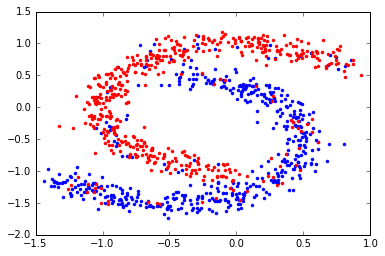

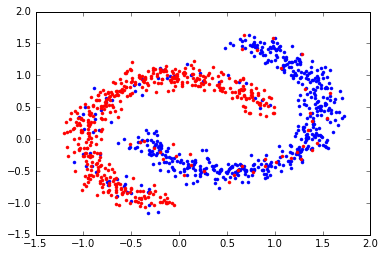

In [8]:
X,Y,Op = rg.create_dataset(N = 1000, Dtype='MOONS', noise =0.1, varargin = 'PRESET')

plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')
plt.show()


Options = {'s':0.1,'d':np.array([0.6, -0.6])}

X,Y,Op = rg.create_dataset(N = 1000, Dtype='MOONS', noise =0.1, varargin = False,**Options)

plt.plot(X[np.where(Y==1)[0],0],X[np.where(Y==1)[0],1],'.b')
plt.plot(X[np.where(Y==-1)[0],0],X[np.where(Y==-1)[0],1],'.r')
plt.show()


#Options = {'s':0.1,'d':np.array([0.6, -0.6]),'m1':2, 'ndist':3}

### LoadMatFiles

In [9]:
# if you are sure .mat files has 'x','y','xt','yt' variables use  rg.load_Dataset(filePath1)
# Example

filePath1 = '/media/nikb/UB/@UniGe/@Courses/regML2016/Lab1/Lab 1/example_datasets/2moons.mat'

x,y,xt,yt = rg.load_Dataset(filePath1)
print x.shape, y.shape, xt.shape, yt.shape

#------------------------------------------------------------------------------------------------------
# if you are not sure use loadMatFile(filePath1), it will return X,Y and Mat, 
# if there are 'X' or  'x' and 'Y' or 'y' variables they will be in X and Y and Mat will return everything in .mat file as
# dictionary from which you can take your dataset
# Example

filePath2 = '/media/nikb/UB/@UniGe/@Courses/regML2016/Lab1/Lab 1/challenge_datasets/one_train.mat'

X,Y,Mat = rg.loadMatFile(filePath2)
print Mat.keys()
X = Mat['one_train']
print X.shape

(200, 2) (200, 1) (200, 2) (200, 1)
Input data x or X not found
Target data y or Y not found
['__version__', '__header__', 'one_train', '__globals__']
(300, 256)


# 2. Compute Kernal

[[ 9 10  6  3  1]
 [ 9  6  8  1  1]
 [ 3  4  7  6  4]
 [ 9  4  3  6 10]
 [ 8  0  3  8  7]
 [ 8  9  6  6  4]
 [ 0  9 10  7  0]
 [ 2  7 10  6  5]
 [ 2  4 10  9  9]
 [ 3  9  6  4  1]]
[[ 7  4  6  4  9]
 [ 5 10  4  5  7]
 [ 4  7  6  6  5]
 [ 2  0  7  7  7]
 [ 2  5  6  6 10]
 [ 1  7  7  7  4]]
[[160 191 165  88 132 146]
 [148 149 137  88 112 118]
 [139 141 138 125 144 138]
 [211 197 168 151 192 140]
 [169 141 133 142 152 113]
 [188 212 187 128 173 171]
 [124 165 165 119 147 182]
 [171 185 178 151 185 183]
 [207 198 195 200 228 199]
 [118 156 140  83 121 140]]
[[ 4173281  7077888  4574296   704969  2352637  3176523]
 [ 3307949  3375000  2628072   704969  1442897  1685159]
 [ 2744000  2863288  2685619  2000376  3048625  2685619]
 [ 9528128  7762392  4826809  3511808  7189057  2803221]
 [ 4913000  2863288  2406104  2924207  3581577  1481544]
 [ 6751269  9663597  6644672  2146689  5268024  5088448]
 [ 1953125  4574296  4574296  1728000  3241792  6128487]
 [ 5088448  6434856  5735339  3511808  6

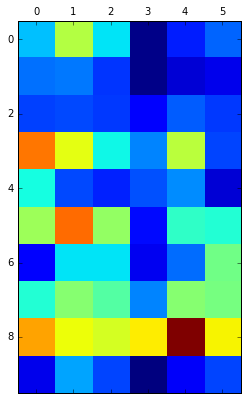

In [79]:
x1 = np.random.randint(11, size=(10, 5))
x2 = np.random.randint(11, size=(6, 5))

K1 = rg.kernel(knl = 'lin',   kpar = [],  X1 =x1, X2 =x2)
K2 = rg.kernel(knl = 'pol',   kpar = 3,   X1 =x1, X2 =x2)
K3 = rg.kernel(knl = 'gauss', kpar = 0.5, X1 =x1, X2 =x2)
K4 = rg.kernel(knl = 'gauss', kpar = 0.5, X1 =x1, X2 =x1)

print x1
print x2
print K1
print K2
print K3
print K4
plt.matshow(K2)
plt.show()

# 3. Applying Filter
### After computing kernal, applying filters   
**Regularized least squares (rls), Iterative Landweber  (land), Truncated SVD (tsvd), nu-method (nu), Spectral cut-off (cutoff)**

In [10]:
x1 = np.random.randint(11, size=(10, 5))
y1 = np.array([-1,-1,-1,-1,-1,1,1,1,1,1]).T

x2 = np.random.randint(11, size=(6, 5))
y2 = np.array([-1,-1,-1,1,1,1]).T

K = rg.kernel(knl = 'lin', kpar = [], X1 =x1, X2 =x1)
print 'Kernal'
print K


print 'RLS---------------'
alpha = rg.rls(K, t_range =[0.1,0.5], y = y1)
print np.around(alpha,3)

print 'TSVD -----------------------'
alpha = rg.tsvd(K,t_range =[0.1,0.5], y =y1)
print np.around(alpha,3)

print 'NU -----------------------'
alpha = rg.nu(K, t_max= 4, y = y1, all_path = False)
print np.around(alpha,3)

print 'LAND -----------------------'
alpha = rg.land(K,t_max =4, y = y1, tau = 2, all_path = True)
print np.around(alpha,3)

print 'CUT-OFF---------------'
alpha = rg.cutoff(K,t_range = 0.1, y = y1)
print np.around(alpha,3)

alpha = rg.cutoff(K,t_range = [0.1,0.5], y = y1)
print np.around(alpha,3)

Kernal
[[137  87 139  80 143  82 147 105  72 103]
 [ 87 235 191 216 208 126 179 166 152 257]
 [139 191 266 182 220 158 208 176 194 220]
 [ 80 216 182 225 228 150 176 164 170 254]
 [143 208 220 228 279 176 221 198 183 258]
 [ 82 126 158 150 176 144 150 104 152 162]
 [147 179 208 176 221 150 212 151 152 208]
 [105 166 176 164 198 104 151 171 125 196]
 [ 72 152 194 170 183 152 152 125 182 188]
 [103 257 220 254 258 162 208 196 188 294]]
RLS---------------
[[-0.759  0.297  0.898 -1.454  1.147  0.923 -0.612 -0.599 -1.324  0.754]
 [-0.155  0.055  0.178 -0.289  0.232  0.189 -0.125 -0.12  -0.26   0.15 ]]
TSVD -----------------------
[[-0.005 -0.006 -0.002  0.002  0.004  0.006 -0.003 -0.001  0.006 -0.002]
 [-0.005 -0.006 -0.002  0.002  0.004  0.006 -0.003 -0.001  0.006 -0.002]]
NU -----------------------
[[[ 4.127]
  [ 2.905]
  [ 1.989]
  [ 0.462]
  [ 1.989]
  [-0.645]
  [ 4.12 ]
  [ 4.365]
  [-1.134]
  [ 3.265]]]
LAND -----------------------
[[[  0.00000000e+00]
  [  0.00000000e+00]
  [  0.000

## Spliting test

In [5]:
y =2*np.random.randint(2, size=(10, 1))-1
print y.T
sets = rg.splitting(y, k=2, type = 'rand')
print sets

[[ 1 -1  1 -1 -1 -1 -1  1 -1  1]]
[[2, 9, 4, 8, 3], [0, 7, 6, 5, 1]]


# 4. Learn

In [29]:
X,y,Op = rg.create_dataset(N = 500, Dtype='MOONS', noise =0.1, varargin = 'PRESET')
Xt,yt,Op = rg.create_dataset(N = 500, Dtype='MOONS', noise =0.1, varargin = 'PRESET')

print 'X,  y,  Xt,  yt.. Training/Testing size'
print X.shape, y.shape, Xt.shape,yt.shape


# ---------------------------Learn---Alpha--------------------------------------
#filt =['rls','land','tsvd','nu','cutoff']
#knl =['lin','poly','gauss']
#kpar =[  [] , int  , float ]

print '  '
print 'RLS------Lin---------------'

trange =[1,4]
krnl = 'lin'
filtr ='rls'
kparr =2

alpha,err = rg.learn(knl=krnl, kpar=kparr, filt =filtr, t_range =trange, X = X, y =y, task = 'class')
K = rg.kernel(knl = krnl, kpar = kparr, X1 =Xt, X2 =X)
for i in range(len(alpha)):
    y_lrnt = np.dot(K,alpha[i])
    errT = rg.learn_error(y_lrnt, yt,'class') 
    print '  For t :',trange[i]
    print '   Training Error: ', err[i], '  Testing Error :' , errT

print '  '
print 'RLS--------Pol-------------'
trange =10
krnl = 'pol'
filtr ='rls'
kparr =2

alpha,err = rg.learn(knl=krnl, kpar=kparr, filt =filtr, t_range =trange, X = X, y =y, task = 'class')
K = rg.kernel(knl = krnl, kpar = kparr, X1 =Xt, X2 =X)

trange = [trange]
for i in range(len(alpha)):
    y_lrnt = np.dot(K,alpha[i])
    errT = rg.learn_error(y_lrnt, yt,'class') 
    print '  For t :',trange[i]
    print '    Training Error: ', err[i], '  Testing Error :' , errT


print '  '
print 'Land-------------------'
krnl = 'pol'
kparr =2
filtr ='land'
trange = 2

alpha,err = rg.learn(knl=krnl, kpar=kparr, filt =filtr, t_range =trange, X = X, y =y, task = 'class')
K = rg.kernel(knl = krnl, kpar = kparr, X1 =Xt, X2 =X)
for i in range(len(alpha)):
    y_lrnt = np.dot(K,alpha[i])
    errT = rg.learn_error(y_lrnt, yt,'class') 
    print '   Training Error: ', err[i], '  Testing Error :' , errT


print '  '
print 'TSVD---------------------'
krnl = 'pol'
kparr =2
filtr ='tsvd'
trange =[0.1,0.2]

alpha,err = rg.learn(knl=krnl, kpar=kparr, filt =filtr, t_range =trange, X = X, y =y, task = 'class')
K = rg.kernel(knl = krnl, kpar = kparr, X1 =Xt, X2 =X)
for i in range(len(alpha)):
    y_lrnt = np.dot(K,alpha[i])
    errT = rg.learn_error(y_lrnt, yt,'class') 
    print 'for t :',trange[i]
    print '   Training Error: ', err[i], '  Testing Error :' , errT

print '  '
print 'NU---------------------'
krnl = 'gauss'
kparr = rg.autosigma(X, 5)
filtr ='nu'
trange = 4

alpha,err = rg.learn(knl=krnl, kpar=kparr, filt =filtr, t_range =trange, X = X, y =y, task = 'class')
K = rg.kernel(knl = krnl, kpar = kparr, X1 =Xt, X2 =X)
for i in range(len(alpha)):
    y_lrnt = np.dot(K,alpha[i])
    errT = rg.learn_error(y_lrnt, yt,'class') 
    print '   Training Error: ', err[i], '  Testing Error :' , errT


X,  y,  Xt,  yt.. Training/Testing size
(500, 2) (500, 1) (500, 2) (500, 1)
  
RLS------Lin---------------
  For t : 1
   Training Error:  0.27   Testing Error : 0.278
  For t : 4
   Training Error:  0.28   Testing Error : 0.29
  
RLS--------Pol-------------
  For t : 10
    Training Error:  0.278   Testing Error : 0.286
  
Land-------------------
Calculated the step size tau :  0.00129455372095
   Training Error:  1.0   Testing Error : 1.0
   Training Error:  0.294   Testing Error : 0.3
  
TSVD---------------------
for t : 0.1
   Training Error:  0.258   Testing Error : 0.26
for t : 0.2
   Training Error:  0.258   Testing Error : 0.26
  
NU---------------------
   Training Error:  1.0   Testing Error : 1.0
   Training Error:  1.0   Testing Error : 1.0
   Training Error:  0.102   Testing Error : 0.094
   Training Error:  0.102   Testing Error : 0.094


# 5. KCV  K-Fold Cross Validation 

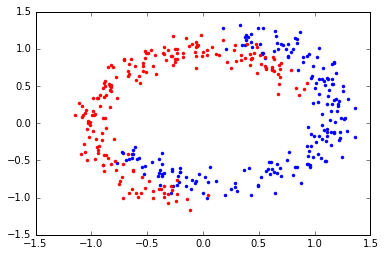

split number : 1
split number : 2
split number : 3
split number : 4
split number : 5
(320, 1)
KCV Error
Errors :  [ 0.05  0.05  0.05  0.05  0.05  0.05  0.05]
Trange :  [0.1, 0.5, 1, 2, 3, 4, 5]
-------------------------------
Selected t     : 0.1
Training Error : 0.045
Testing  Error : 0.0525


In [41]:
##-----Dataset
X, Y,_,_,_ = rg.moons(N =[200,200], s =0.1, d=np.array([0.2, -0.2]), angle =0.1)
Xt,Yt,_,_,_ = rg.moons(N =[200,200], s =0.1, d=np.array([0.2, -0.2]), angle =0.1)

plt.plot(X[np.where(Y>=0)[0],0],X[np.where(Y>=0)[0],1],'.b')
plt.plot(X[np.where(Y< 0)[0],0],X[np.where(Y< 0)[0],1],'.r')
plt.show()

# ------------_Choose parametes ----------------------
knl      ='gauss'
kpar     = rg.autosigma(X,5)
filt     ='rls'
trange   = [0.1, 0.5 ,1,2,3,4,5]                  #[1,1.5,5,10] #[0.1,0.3,0.5]#, 0.3, 0.5, 1.0,1.5, 3, 5]
task     ='class'
splitype ='seq'
k        = 5             # of Splits

#-- KCV---------

t_kcv_idx, avg_err_kcv = rg.kcv(knl,kpar,filt, t_range=trange, X=X, y=Y,k=k, task=task, split_type=splitype)

#print t_kcv_idx, avg_err_kcv

if filt in ['land','nu']:
    tval = t_kcv_idx + 1
else:
    tval = trange[t_kcv_idx]

alpha, err = rg.learn(knl, kpar, filt, tval, X, Y, task)

index = np.argmin(err)

K = rg.kernel(knl, kpar, X1 =Xt, X2 =X)

y_learnt = np.dot(K,alpha[index])

lrn_error = rg.learn_error(y_learnt,Yt, task)

print 'KCV Error'
print 'Errors : ', avg_err_kcv
print 'Trange : ', trange

print '-------------------------------'
print 'Selected t     :', tval
print 'Training Error :', err[index]
print 'Testing  Error :', lrn_error